# Analisando Dados do Programa Nacional de Imunização (PNI)

## Introdução

A covertura de vacinação, segundo o [Centro de Liderança Pública - CLP](https://www.clp.org.br/cobertura-vacinal-o-que-e-como-esta-e-por-que-e-tao-importante/) é a porcentagem de pessoas completamente vacinadas dentro do total de pessoas que precisam ser vacinadas. Esse dado é muito importante porque, com a imunização pode-se prevenir ou até erradicar doenças, como é o caso da [Varíola, Poliomielite](https://vacinas.com.br/blog/doencas-erradicadas-com-a-vacinacao/).  <br/>
O Brasil, por muitas décadas foi considerado uma referência no quesito de imunisação graças à força do SUS para conseguir cobrir um país com dimensões continentais.  
Mas como será que o Brasil está nesse momento, manteve, aumentou ou diminuiu a sua coberta vacianal? É o que essa análise tentará responder.

## Os Dados  
Para essa Análise, vamos utilizar a base extraída do [DataSus - Tabnet](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def) sobre a cobertura vancial. O período analisado vai de 2010 até 2018. Na base de dados vemos que já temos os valores de 2019, porém segundo o próprio DataSus a última atualização do dado foi em setembro/19, então natualmente o valor é bem menor que os anos anteriores, então para não chegarmos em conclusão errada preferi retirar os dados desse ano.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = "{:.2f}".format

In [2]:
pni = pd.read_csv('./dados/dados-limpos/cobertura-vacinal-limpo.csv')
taxa_obito = pd.read_csv('./dados/dados-limpos/taxa-obito-limpo.csv')
gastos_sus = pd.read_csv('./dados/dados-limpos/gastos-sus-limpo.csv')

### Verificando os Datasets.  
Um overview dos dataset, para ver se as importações estão ok.

In [3]:
pni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   243 non-null    int64  
 1   uf      243 non-null    object 
 2   value   243 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.8+ KB


In [4]:
pni.describe()

,index,value
count,243.00,243.00
mean,2014.00,75.90
std,2.59,13.18
min,2010.00,41.43
25%,2012.00,68.01
50%,2014.00,75.54
75%,2016.00,84.01
max,2018.00,113.07


In [5]:
pni.head()

,index,uf,value
0,2010,RO,79.26
1,2011,RO,92.75
2,2012,RO,85.82
3,2013,RO,76.72
4,2014,RO,98.18


In [6]:
taxa_obito.head()

,uf,ano,value
0,AC,2010,32.70
1,AC,2011,34.93
2,AC,2012,28.82
3,AC,2013,29.36
4,AC,2014,28.00


In [7]:
taxa_obito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   uf      234 non-null    object 
 1   ano     234 non-null    int64  
 2   value   234 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


In [8]:
taxa_obito.describe()

,ano,value
count,234.00,234.00
mean,2014.00,43.39
std,2.59,13.35
min,2010.00,17.09
25%,2012.00,34.19
50%,2014.00,41.53
75%,2016.00,49.33
max,2018.00,87.02


In [9]:
gastos_sus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   uf      234 non-null    object 
 1   ano     234 non-null    int64  
 2   value   234 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.6+ KB


In [10]:
gastos_sus.describe()

,ano,value
count,234.00,234.00
mean,2014.00,500.80
std,2.59,655.51
min,2010.00,17.11
25%,2012.00,132.15
50%,2014.00,219.43
75%,2016.00,667.15
max,2018.00,3442.01


##  Hipóteses  
Para continuidade da análise, vamos gerar algumas hipóteses para investigar:
* Cobertura vacinal maior está relacionado à taxa de mortalidade menor.
* Cobertura vacinal maior está relacionado à gastos menor do sus.
* Ao longo dos ultimos anos, a cobertura vacinal diminuiu em todo território nacional.
* A região sudeste possui a maior cobertura vacinal que as outras regiões.

### H1: A cobertura vacinal maior está relacionado à taxa de óbito menor  
Para validarmos essa hipótese, vamos verificar os dois dataset que importamos (taxa de morte e cobertura vacinal).

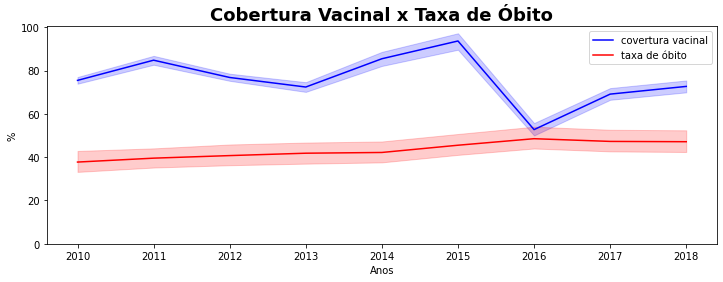

In [11]:
plt.figure(figsize=(12, 4))

plt.title('Cobertura Vacinal x Taxa de Óbito', fontdict={'fontsize': 18, 
                                                         'fontweight' :'bold'})
sns.lineplot(data=pni, x='index', y='value', color='b')
sns.lineplot(data=taxa_obito, x='ano', y='value', color='r')

plt.yticks(np.arange(0, 101, 20))
plt.xticks(np.arange(2010, 2019, 1))
plt.ylabel('%')
plt.xlabel('Anos')
plt.legend(['covertura vacinal', 'taxa de óbito'])


plt.show()

Esse primeiro gráfico mostra tanto a cobertura vacinal quanto a taxa de óbito no âmbito nacional - a linha mais forte representa a média de todos os estados e as sombras o intervalo de confiança dos dados.  
De qualquer forma, não é possível estabelecer uma relação entre esses dois dados. A taxa de óbito mantem um crescimento tímido e a cobertura vacinal sofre uma maior variação, especialmente entre 2015 e 2016. Vamos verificar se essa relação é a mesma nas outras regiões.

In [12]:
norte = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']
nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
centro_oeste = ['GO', 'MT', 'MS']
sudeste = ['ES', 'MG', 'RJ', 'SP']
sul = ['PR', 'RS', 'SC']

def plot_cv_to(regiao, titlo_grafico):
    plt.title(f'Cobertura Vacinal x Taxa de Óbito - Região {titlo_grafico}', fontsize=18)
    sns.lineplot(data=pni.query(f'uf == @regiao'), x='index', y='value', color='b')
    sns.lineplot(data=taxa_obito.query(f'uf == @regiao'), x='ano', y='value', color='r')
    
    plt.yticks(np.arange(0, 101, 20))
    plt.xticks(np.arange(2010, 2019, 1))
    
    plt.ylabel('%')
    plt.xlabel('Anos')
    plt.legend(['covertura vacinal', 'taxa de óbito'])


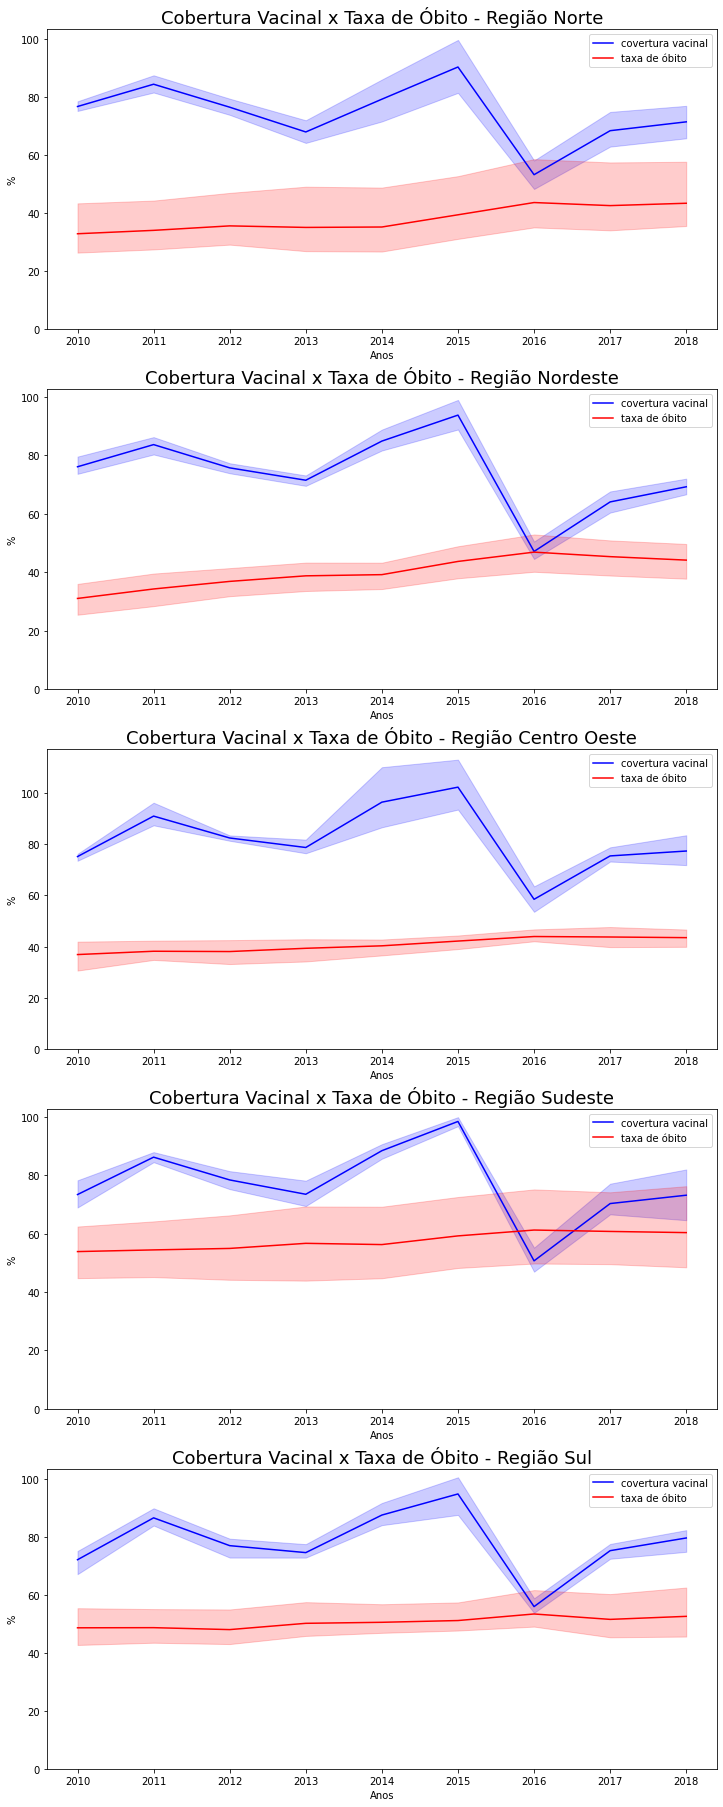

In [13]:
plt.figure(figsize=(12, 32))


plt.subplot(5, 1, 1)
plot_cv_to(norte, 'Norte')

plt.subplot(5, 1, 2)
plot_cv_to(nordeste, 'Nordeste')

plt.subplot(5, 1, 3)
plot_cv_to(centro_oeste, 'Centro Oeste')

plt.subplot(5, 1, 4)
plot_cv_to(sudeste, 'Sudeste')

plt.subplot(5, 1, 5)
plot_cv_to(sul, 'Sul')

Todos os estados mantém um comportamento similar.  
Um ponto que chama atenção é a variação na taxa de óbito das regiões sudeste e norte - isso significa que entre os próprios estados existem variações relevantes.

<br/>

**Conclusão**: Não se pode afirmar que existe uma relação entre a cobertura vacinal e a taxa de óbito. Mas aqui vale ressaltar que a taxa de óbito compreende todas as mortes, se existe os dados referentes à mortes relacionadas às doenças que podem ser evitadas com vacinas, seria possível tirar uma conclusão melhor.

### H2: Cobertura vacinal maior está relacionado à gastos menor do sus

Como estamos somando os gastos de todos os estados, os valores estão na casa dos bilhões, e para facilitar a visualisação vamos aplicar a escala.

In [20]:
gastos_agrupados = gastos_sus.groupby('ano').sum() / 1000

In [23]:
pni_para_plot = pni['value'] / 10

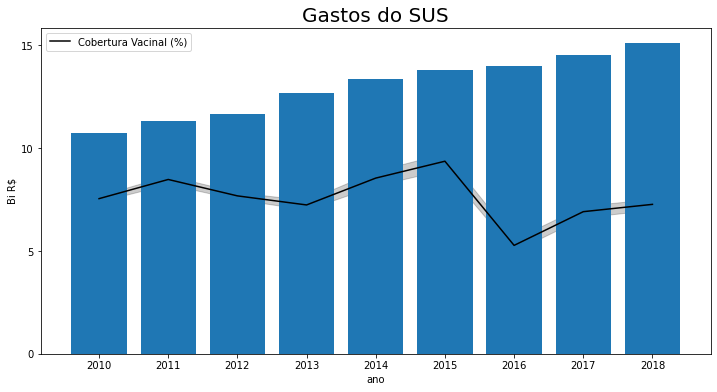

In [58]:
plt.figure(figsize=(12, 6))

plt.title('Gastos do SUS', fontsize=20)
plt.bar(data=gastos_agrupados, x=gastos_agrupados.index, height='value')
sns.lineplot(data=pni, x='index', y=pni_para_plot, color='k')

plt.xticks(np.arange(2010, 2019, 1))
plt.yticks(np.arange(0, 16, 5))

plt.xlabel('ano')
plt.ylabel('Bi R$')

plt.legend(['Cobertura Vacinal (%)'])

plt.show()

**Conclusão**: os gastos do SUS vem aumento ano a ano, enquanto a cobertura vacinal apresentou um comportamento diferente. Portanto não é possível afirmar que a cobertura vacinal maior apresentou uma queda nos gastos do SUS. Assim como foi feito na investigação da correlação da taxa de óbito com a cobertura vacinal, aqui seria interessante ter os valores específicos dos gastos com relação à doenças que podem ser evidadas com as vacinas.

### H3: Ao longo dos ultimos anos, a cobertura vacinal diminuiu em todo território nacional.  
Já vimos nas visualizações anteriores os valores absolutos e dividos por região. Em todos os casos, o que se nota é que o comportamento é similar à todos - entre 2014 e 2015 existe um aumento significante e logo após uma queda abrupta. O motivo dessa queda pode ser uma questão interessante de investigar.

### H4:  A região sudeste possui a maior cobertura vacinal que as outras regiões.

In [70]:
def plota_cv_por_regiao(regiao, color):
    sns.lineplot(data=pni.query('uf == @regiao'), x='index', y='value', 
                 color=color, ci=None)

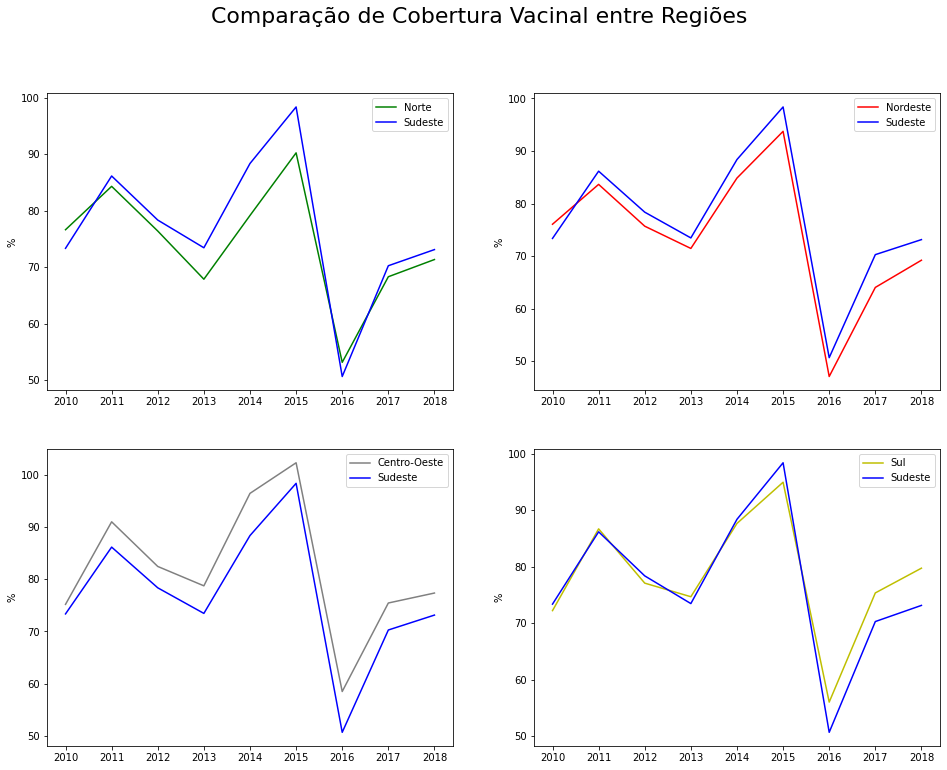

In [87]:
plt.figure(figsize=(16, 12))
plt.suptitle('Comparação de Cobertura Vacinal entre Regiões', fontsize=22)

plt.subplot(2, 2, 1)
plota_cv_por_regiao(norte, 'g')
plota_cv_por_regiao(sudeste, 'b')
plt.legend(['Norte', 'Sudeste'])
plt.xlabel('')
plt.ylabel('%')

plt.subplot(2, 2, 2)
plota_cv_por_regiao(nordeste, 'r')
plota_cv_por_regiao(sudeste, 'b')
plt.legend(['Nordeste', 'Sudeste'])
plt.xlabel('')
plt.ylabel('%')

plt.subplot(2, 2, 3)
plota_cv_por_regiao(centro_oeste, 'gray')
plota_cv_por_regiao(sudeste, 'b')
plt.legend(['Centro-Oeste', 'Sudeste'])
plt.xlabel('')
plt.ylabel('%')

plt.subplot(2, 2, 4)
plota_cv_por_regiao(sul, 'y')
plota_cv_por_regiao(sudeste, 'b')
plt.legend(['Sul', 'Sudeste'])
plt.xlabel('')
plt.ylabel('%')

plt.show()

**Conclusão**: A região Centro-Oeste mostrou que uma cobertura vacinal maior durante o período da análise. A região sul ultrapassou o valor do sudeste a partir de 2016.

## Conclusão  
Das 4 hipóteses levantadas inicalmente, 3 delas se mostraram inconclusivas para os dados que temos. Isso porque, no dataset com as despesas do sus não há discriminação do destino dos gastos, bem como no dataset de taxa de óbito não é somente para as doenças que podem ser evitadas pela vacina. Dentro do próprio DATASUS é possível realizar alguns filtros, no futuro pode ser interessante refazer as análises com dados mais delimitados. Seria bom também ter os dados da cobertura vacinal atualizada, pelo menos até 2020 para podermos ver o efeito da pandemia dos dados.